# How to use the framework


In case that FrImCla is not installed in your system, the first task consist in installing using pip.

In [1]:
!pip install frimcla

    100% |████████████████████████████████| 419kB 7.9MB/s 
    100% |████████████████████████████████| 1.5MB 17.6MB/s 
    100% |████████████████████████████████| 348kB 27.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/eb/16/4d/5bded41e2ca07dce0e11ef0fc31b14daf37d417c1c865e9cba
  Stored in directory: /root/.cache/pip/wheels/fb/2a/81/12bc1070527dc81ef856f9d36db9ec0a42e8c14985d005395b
  Stored in directory: /root/.cache/pip/wheels/8c/0e/36/56d4e5ddf02e0ddd1d8f9eb8d90975a5192e0155ffe28ff19c
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built frimcla mahotas commentjson wget
  Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


To begin, we have to import all the classes that we will need to be able to use our framework.

In [2]:
import warnings
import time
import argparse
from frimcla.utils.conf import Conf
from imutils import paths
from __future__ import print_function
from frimcla.index_features import generateFeatures
from frimcla.StatisticalComparison import statisticalComparison
from frimcla.train import train
from frimcla.prediction import prediction
warnings.simplefilter(action="ignore", category=FutureWarning)

Using TensorFlow backend.


### Configuring the dataset path

First of all we have to know the path which we have our dataset. The dataset must have a folder for each class that we want to predict. 

In [3]:
!wget "https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download&authuser=0" -O mias.zip
!unzip mias.zip

datasetPath = "./Mias"

--2019-03-20 16:19:12--  https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download&authuser=0
Resolving drive.google.com (drive.google.com)... 74.125.141.102, 74.125.141.139, 74.125.141.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.141.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download [following]
--2019-03-20 16:19:12--  https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-3s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bvr1g97vgg2cd3h4uob5ucc7ise1fv03/1553097600000/05147614325801676241/*/1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ?e=download [following]
--2019-03-20 16:19:15--  https://doc-0g-3s-docs.googleusercontent.com/docs/securesc

### Feature Extractor

In this step we decide the feature extractor models that we are going to use with our dataset. These models will extract the most important points of the images. Then we save the points and with the classifier models that we will choose after this, we will classify the images with the classes of the dataset. Each feature extractor model has a different way to collect the most important points and for this reason we have to compare the models, because there is not a model that always fits better with the datasets.

In [0]:
featureExtractors = [["vgg19", "False"], ["hog"]]

Now that we have the feature extractor models we can execute the algorithm that collect the features of the dataset for each model. The only thing that we have to do is indicate the paths of the dataset and the output and the models that we want to use for the study. The verbose parameter is to indicate whether we want to appear information about the execution on console.

In [5]:
generateFeatures("./", 32, datasetPath, featureExtractors, False)

[INFO] loading ['vgg19', 'False']...
Instructions for updating:
Colocations handled automatically by placer.
574717952/574710816 [==============================] - 6s 0us/step
[WARN] minimum init buffer not reached - 2019-03-20 16:26:56.328028
[INFO] creating datasets... - 2019-03-20 16:26:56.328567
[INFO] writing un-empty buffers... - 2019-03-20 16:26:56.329796
[INFO] writing `image_ids` buffer - 2019-03-20 16:26:56.329937
[INFO] writing `features` buffer - 2019-03-20 16:26:56.331280
[INFO] compacting datasets... - 2019-03-20 16:26:56.335241
[INFO] old size of `image_ids`: 296; new size: 296 - 2019-03-20 16:26:56.335729
[INFO] old size of `features`: 296; new size: 296 - 2019-03-20 16:26:56.335834
[INFO] loading ['hog']...


/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[WARN] minimum init buffer not reached - 2019-03-20 16:27:03.761267
[INFO] creating datasets... - 2019-03-20 16:27:03.761449
[INFO] writing un-empty buffers... - 2019-03-20 16:27:03.762749
[INFO] writing `image_ids` buffer - 2019-03-20 16:27:03.763159
[INFO] writing `features` buffer - 2019-03-20 16:27:03.764309
[INFO] compacting datasets... - 2019-03-20 16:27:03.824174
[INFO] old size of `image_ids`: 296; new size: 296 - 2019-03-20 16:27:03.824427
[INFO] old size of `features`: 296; new size: 296 - 2019-03-20 16:27:03.824779


This algorithm will create a set of files that contains the features of the images. Each file corresponds to a model of those indicated above. 

### Classification models

Once we have stored the features of the images, we have to choose the clasiffication models that we are going to use for the dataset. All these classifiers will be used for each feature extractor model to know which is the performance of every combination.

In [0]:
modelClassifiers = [ "MLP","SVM","KNN", "LogisticRegression", "GradientBoost", "RandomForest"]

With the classifiers chosen, now that we have to do is to carry out a statistical analysis. The analysis studies and compares every combination. Once the analysis has compared all the combinations gives us the best combination of feature extractor model and classifier model and all the combinations that have not significant differencies with the best result.  

### Performance measures

We have to select a performance measure to know which is the best model. In this case, there are five different measures (accuracy, recall, precision, auroc and f1). The user have to select only one of the five measures. Accuracy is the default measure.

In [0]:
measure = "accuracy"

The combination(hog-SVM) is not allowed
The combination(hog-KNN) is not allowed
The combination(hog-LogisticRegression) is not allowed


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


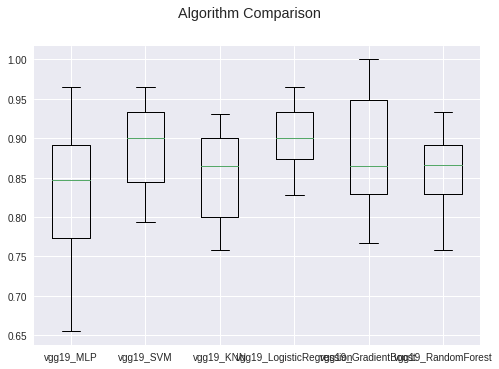

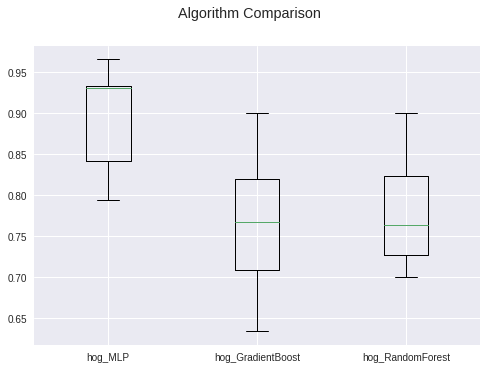

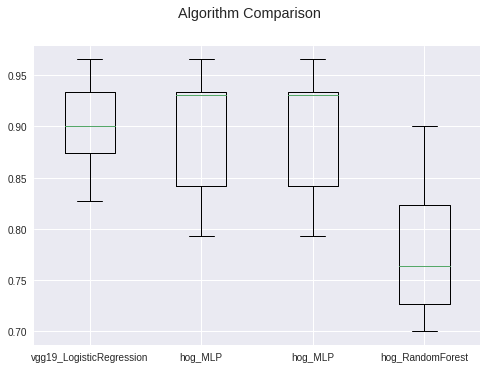

In [8]:
statisticalComparison("./output", datasetPath, featureExtractors, modelClassifiers, measure, 10, False)

### Training the best model

Finally, we have to train the resulting combination. In this step, we only train the best model with all the images of the datset. In this case we do not split the dataset in test and train data, we need all the images to train and improve the results of the model. 

In this function FrImCla asks the user if he/she wants a web application or not (Y if the user wants the webapp). This web application uses the best model selected by FrImCla for this problem. The application generated is very simple and only contains a text box and a button to predict the class of new images. FrImCla generates a zip file that must be decompressed to be used. Inside the folder the user has to open a new terminal in this path and run the following command:

`python3 FlaskApp/app.py`

The comand executes the web application in http://localhost:5000/ To use the application the user has to write open the link in his/her browser.



In [9]:
train("./output", datasetPath, 1)

[INFO] gathering train/test splits...
[INFO] tuning hyperparameters...
[INFO] best hyperparameters: {'C': 10000.0}
[INFO] dumping classifier...
Do you want to generate a web app to classify the images with the best combination? y/n
y


Once we have the model trained, we can predict the class of the new images.


If you want to download the web application you have to execute the following code.

In [0]:
from google.colab import files
files.download('./output/Mias/webApp.zip') 

### Prediction

Now, with the best model trained we can predict the classes of our images. For this task, we have developed another algorithm to use the model. This execution will give us the predicted class of the image that we choose. 

If the combination of feature extractor and machine learning algorithm is not the best, FrImCla ask the user in the command window if he wants to continue with this combination. To continue with the prediction he has to tell Y (yes).

In [18]:
image = "./Mias/NORMAL/mdb035.jpg"
featureExtractor = ["vgg19", "False"]
classifier = "MLP"

# prediction(image, "./", datasetPath, featureExtractor, classifier)
prediction(featureExtractor, classifier, image, ".", datasetPath)

[INFO] loading model...
This is not the best model. Are you sure you want to predict with it?
y


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

[INFO] loading ['vgg19', 'False']...
[INFO] class predicted for the image NORMAL:mdb035.jpg: ['NORMAL']
